## 1. Import Required Libraries
Import pandas, numpy, matplotlib, seaborn, and any other libraries needed for data analysis and visualization.

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

## 2. Load Commit Data
Load the commit data from the CSV file `data/sampled_50k_simple_eav.db.csv` into a pandas DataFrame.

In [4]:
# Load Commit Data
csv_path = 'data/sampled_50k_simple_eav.db.csv'
df = pd.read_csv(csv_path)
df.head()

,block_nr,num_entities,num_attributes,num_string_attrs,num_numeric_attrs,payload_kb,commit_time_ms,db_size_kb
0,1,1,13,8,5,0,0,4
1,2,3,27,12,15,0,0,4
2,3,1,13,8,5,0,0,4
3,4,1,12,6,6,82,2,4
4,5,51,1312,906,406,108,7,4


In [11]:
# Compute Commit Time Statistics
commit_times = df['commit_time_ms']
min_time = commit_times.min()
max_time = commit_times.max()
percentiles = commit_times.quantile([0, 0.25, 0.5, 0.75, 1])

print(f"Minimum Commit Time: {min_time} ms")
print(f"Maximum Commit Time: {max_time} ms")
print("Percentiles:")
print(percentiles)

Minimum Commit Time: 0 ms
Maximum Commit Time: 574 ms
Percentiles:
0.00      0.0
0.25      2.0
0.50      3.0
0.75      4.0
1.00    574.0
Name: commit_time_ms, dtype: float64


## 3. Visualize Commit Time Distribution
Plot histograms and density plots to visualize the distribution of commit times across all blocks.

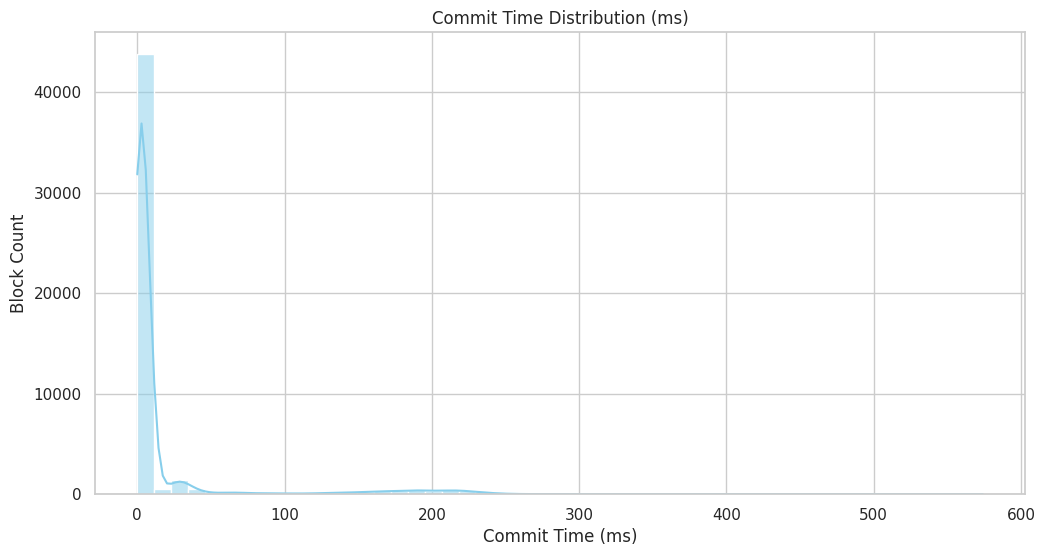

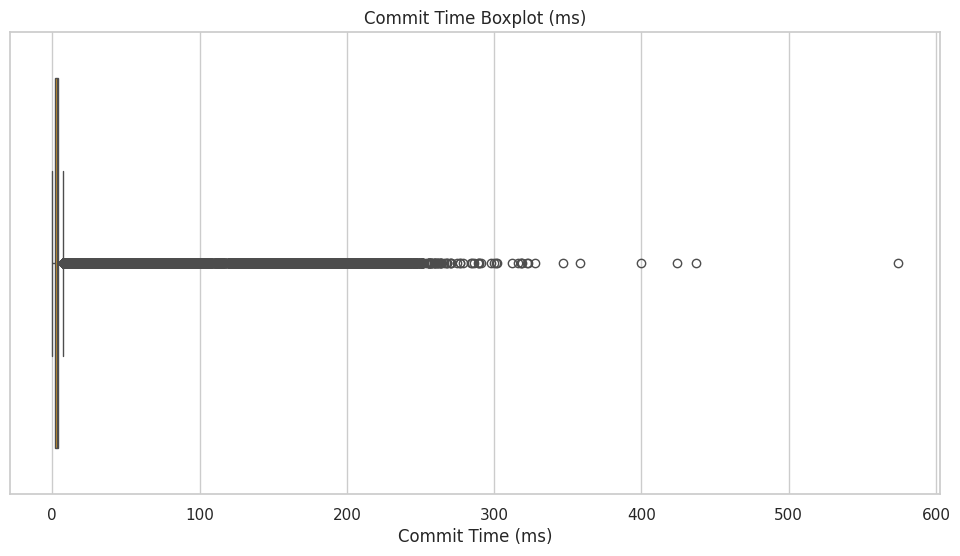

In [5]:
# Visualize Commit Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['commit_time_ms'], bins=50, kde=True, color='skyblue')
plt.title('Commit Time Distribution (ms)')
plt.xlabel('Commit Time (ms)')
plt.ylabel('Block Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['commit_time_ms'], color='orange')
plt.title('Commit Time Boxplot (ms)')
plt.xlabel('Commit Time (ms)')
plt.show()

## 4. Correlation Analysis with Attribute Counts
Calculate and visualize correlations between commit times and the number of string and numeric attributes per block.

Correlation matrix:
                   commit_time_ms  num_string_attrs  num_numeric_attrs  \
commit_time_ms           1.000000          0.956558           0.912424   
num_string_attrs         0.956558          1.000000           0.951793   
num_numeric_attrs        0.912424          0.951793           1.000000   
num_entities             0.877531          0.914127           0.992140   
payload_kb              -0.058653         -0.078306          -0.076412   

                   num_entities  payload_kb  
commit_time_ms         0.877531   -0.058653  
num_string_attrs       0.914127   -0.078306  
num_numeric_attrs      0.992140   -0.076412  
num_entities           1.000000   -0.077467  
payload_kb            -0.077467    1.000000  

Correlation of each variable with commit_time_ms:
commit_time_ms       1.000000
num_string_attrs     0.956558
num_numeric_attrs    0.912424
num_entities         0.877531
payload_kb          -0.058653
Name: commit_time_ms, dtype: float64


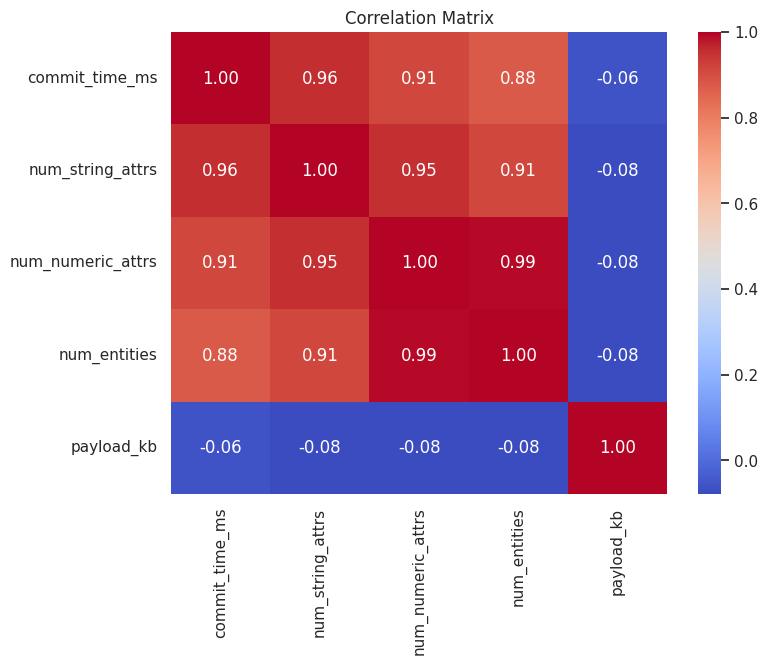

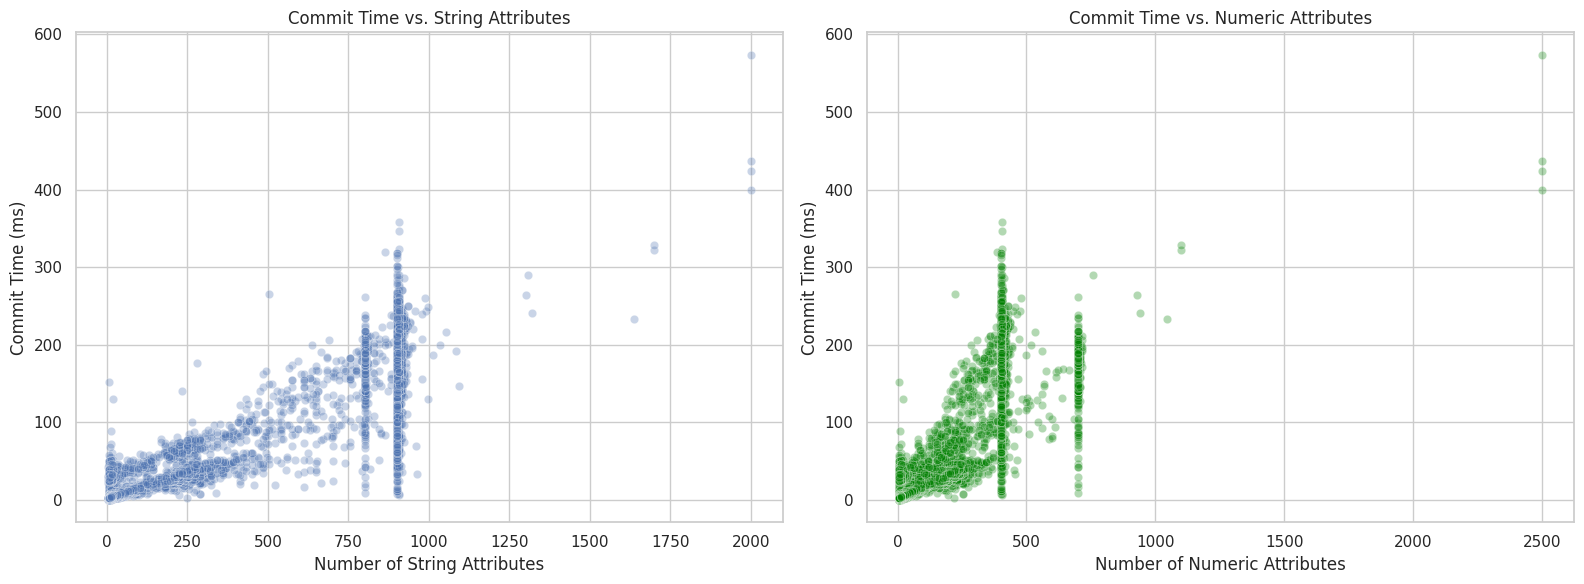

In [6]:
# Correlation Analysis
corr = df[['commit_time_ms', 'num_string_attrs', 'num_numeric_attrs', 'num_entities', 'payload_kb']].corr()
print("Correlation matrix:")
print(corr)
print("\nCorrelation of each variable with commit_time_ms:")
print(corr['commit_time_ms'])

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(ax=axes[0], x='num_string_attrs', y='commit_time_ms', data=df, alpha=0.3)
axes[0].set_title('Commit Time vs. String Attributes')
axes[0].set_xlabel('Number of String Attributes')
axes[0].set_ylabel('Commit Time (ms)')
sns.scatterplot(ax=axes[1], x='num_numeric_attrs', y='commit_time_ms', data=df, alpha=0.3, color='green')
axes[1].set_title('Commit Time vs. Numeric Attributes')
axes[1].set_xlabel('Number of Numeric Attributes')
axes[1].set_ylabel('Commit Time (ms)')
plt.tight_layout()
plt.show()

## 5. Statistical Summary of Commit Times
Provide descriptive statistics (mean, median, mode, standard deviation) for commit times and discuss any observed patterns.

In [ ]:
# Statistical Summary
summary = df['commit_time_ms'].describe()
print(summary)

median = df['commit_time_ms'].median()
mode = df['commit_time_ms'].mode()[0]
print(f'Median: {median}')
print(f'Mode: {mode}')

plt.figure(figsize=(10, 5))
sns.violinplot(x=df['commit_time_ms'], color='purple')
plt.title('Commit Time Violin Plot (ms)')
plt.xlabel('Commit Time (ms)')
plt.show()